# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV70"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
334,REACTOME_REGULATION_OF_ORNITHINE_DECARBOXYLASE...,70,0.993153,7.452321e-08,0.000002
335,REACTOME_CDK_MEDIATED_PHOSPHORYLATION_AND_REMO...,70,0.904858,8.053509e-06,0.000119
336,MIPS_PA700_20S_PA28_COMPLEX,70,0.992106,1.885207e-06,0.000032
337,KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION,70,0.800101,6.946959e-04,0.005698
340,REACTOME_TRNA_AMINOACYLATION,70,0.781157,2.372363e-03,0.015158


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP059035, SRP033135, SRP042161, SRP064464, SRP055810, SRP015449, SRP014428, SRP059775, SRP018838, SRP060416, SRP026537, SRP012461, SRP044206, SRP058773, SRP050992, SRP063840, SRP059732, SRP055153, SRP061207, SRP002605, SRP030617, SRP066834, SRP057196, SRP011578, SRP009266, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (25 != 26)
  warnings.warn(


In [18]:
lv_data.shape

(5787, 48)

In [19]:
lv_data.head()

cell type cell line  \
project   run                                                      
SRP055569 SRR1821717  MCF10a human breast cancer cells       NaN   
          SRR1821716  MCF10a human breast cancer cells       NaN   
          SRR1821715  MCF10a human breast cancer cells       NaN   
          SRR1821714  MCF10a human breast cancer cells       NaN   
          SRR1821713  MCF10a human breast cancer cells       NaN   

                     hour post serum-switch debris control well cells in well  \
project   run                                                                   
SRP055569 SRR1821717                    NaN    NaN          NaN           NaN   
          SRR1821716                    NaN    NaN          NaN           NaN   
          SRR1821715                    NaN    NaN          NaN           NaN   
          SRR1821714                    NaN    NaN          NaN           NaN   
          SRR1821713                    NaN    NaN          NaN           NaN   

                     library protocol patient id subtype assigned cell type  \
project   run                                                                 
SRP055569 SRR1821717              NaN        NaN     NaN                NaN   
          SRR1821716              NaN        NaN     NaN                NaN   
          SRR1821715              NaN        NaN     NaN                NaN   
          SRR1821714              NaN        NaN     NaN                NaN   
          SRR1821713              NaN        NaN     NaN                NaN   

                      ... transfection time cdna synthesis method  \
project   run         ...                                           
SRP055569 SRR1821717  ...          NaN  NaN                   NaN   
          SRR1821716  ...          NaN  NaN                   NaN   
          SRR1821715  ...          NaN  NaN                   NaN   
          SRR1821714  ...          NaN  NaN                   NaN   
          SRR1821713  ...          NaN  NaN                   NaN   

                     library construction method Stage  age c1 chip id  \
project   run                                                            
SRP055569 SRR1821717                         NaN   NaN  NaN        NaN   
          SRR1821716                         NaN   NaN  NaN        NaN   
          SRR1821715                         NaN   NaN  NaN        NaN   
          SRR1821714                         NaN   NaN  NaN        NaN   
          SRR1821713                         NaN   NaN  NaN        NaN   

                     experiment_sample_name knockdown      LV70  
project   run                                                    
SRP055569 SRR1821717                    NaN       NaN -0.140719  
          SRR1821716                    NaN       NaN  0.023890  
          SRR1821715                    NaN       NaN -0.064646  
          SRR1821714                    NaN       NaN  0.044480  
          SRR1821713                    NaN       NaN  0.013533  

[5 rows x 48 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

genotype                  0.063554
disease status            0.027813
developmental stage       0.019516
embryo number             0.019516
lineage                   0.019516
knockdown                 0.019486
cell type                 0.015602
cells in well             0.013216
hour post serum-switch    0.013216
debris                    0.013216
control well              0.013216
library protocol          0.013216
patient id                0.012070
time                      0.010868
transfection              0.010868
treatment                 0.010574
cell line                 0.010185
labexpid                  0.010009
ercc_dilution             0.009695
qc pass                   0.009695
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.015602
tissue       0.005668
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

,,cell type,tissue,LV70
project,run,,,
SRP055569,SRR2019129,mixture of U87 human glioma cells and WI-38 hu...,NaN,0.995904
SRP059035,SRR2049471,PDX,NaN,0.744517
SRP033135,SRR1033274,Human Skeletal Muscle Myoblasts (HSMM),NaN,0.602396
SRP042161,SRR1294542,Glioblastoma,NaN,0.597381
SRP033135,SRR1033195,Human Skeletal Muscle Myoblasts (HSMM),NaN,0.575768
SRP064464,SRR2558170,NaN,NaN,0.570969
SRP059035,SRR2049451,PDX,NaN,0.565731
SRP055569,SRR2018983,mixture of U87 human glioma cells and MCF10a h...,NaN,0.545885
SRP042161,SRR1294622,Glioblastoma,NaN,0.515310


In [25]:
# what is there in these projects?
lv_data.loc[["SRP059035"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cell type cell line      LV70
project   run                                     
SRP059035 SRR2049471       PDX       NaN  0.744517
          SRR2049451       PDX       NaN  0.565731
          SRR2049393       PDX       NaN  0.477848
          SRR2049436       PDX       NaN  0.470354
          SRR2049478       PDX       NaN  0.451569
          SRR2049461       PDX       NaN  0.444278
          SRR2049479       PDX       NaN  0.442582
          SRR2049437       PDX       NaN  0.438906
          SRR2049391       PDX       NaN  0.438012
          SRR2049392       PDX       NaN  0.433106

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

,,cell type,LV70
project,run,,
SRP055569,SRR2019129,mixture of U87 human glioma cells and WI-38 hu...,0.995904
SRP059035,SRR2049471,PDX,0.744517
SRP033135,SRR1033274,Human Skeletal Muscle Myoblasts (HSMM),0.602396
SRP042161,SRR1294542,Glioblastoma,0.597381
SRP033135,SRR1033195,Human Skeletal Muscle Myoblasts (HSMM),0.575768
SRP064464,SRR2558170,NOT CATEGORIZED,0.570969
SRP059035,SRR2049451,PDX,0.565731
SRP055569,SRR2018983,mixture of U87 human glioma cells and MCF10a h...,0.545885
SRP042161,SRR1294622,Glioblastoma,0.515310


## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP002605"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"HeLa cells ({lv_data.loc[(_srp_code, x.name), 'transfection']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
_srp_code = "SRP055810"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: lv_data.loc[(_srp_code, x.name), 'developmental stage']
    + f" ({lv_data.loc[(_srp_code, x.name), 'lineage']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
_srp_code = "SRP064464"

_lv_data = lv_data.loc[(_srp_code,)]
_lv_data = lv_data[lv_data["qc pass"] == "TRUE"]
_tmp = _lv_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets ({_lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

_tmp = lv_data.loc[(_srp_code,)]
_tmp = _tmp[_tmp["qc pass"] == "FALSE"]
final_plot_data = final_plot_data.drop(index=final_plot_data.loc[(_srp_code, _tmp.index),].index)

/tmp/ipykernel_1185/657892551.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  _lv_data = lv_data.loc[(_srp_code,)]
/tmp/ipykernel_1185/657892551.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)]


In [37]:
_srp_code = "SRP014428"

_lv_data = lv_data.loc[(_srp_code,)]
_lv_data = lv_data[~lv_data["cell line"].isna()]
_tmp = _lv_data.loc[(_srp_code,)].apply(
    # lambda x: f"Tumor cells ({x['cell line']})",
    lambda x: f"Tumor cells",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_1185/1149145383.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  _lv_data = lv_data.loc[(_srp_code,)]
/tmp/ipykernel_1185/1149145383.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = _lv_data.loc[(_srp_code,)].apply(


In [38]:
_srp_code = "SRP018838"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: f"Lymphoblastoid cells ({x['cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_1185/3819469741.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [39]:
_srp_code = "SRP059035"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: f"Lung adenocarcinoma (PDX)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_1185/1116290578.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [40]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [41]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [42]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [46]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [47]:
len(attr_order)

15

In [48]:
attr_order[:5]

['Glioma + WI-38 lung fibroblast cells',
 'Lung adenocarcinoma (PDX)',
 'Human Skeletal Muscle Myoblasts (HSMM)',
 'Glioblastoma',
 'Glioma + MCF10 breast cancer cells']

## Plot

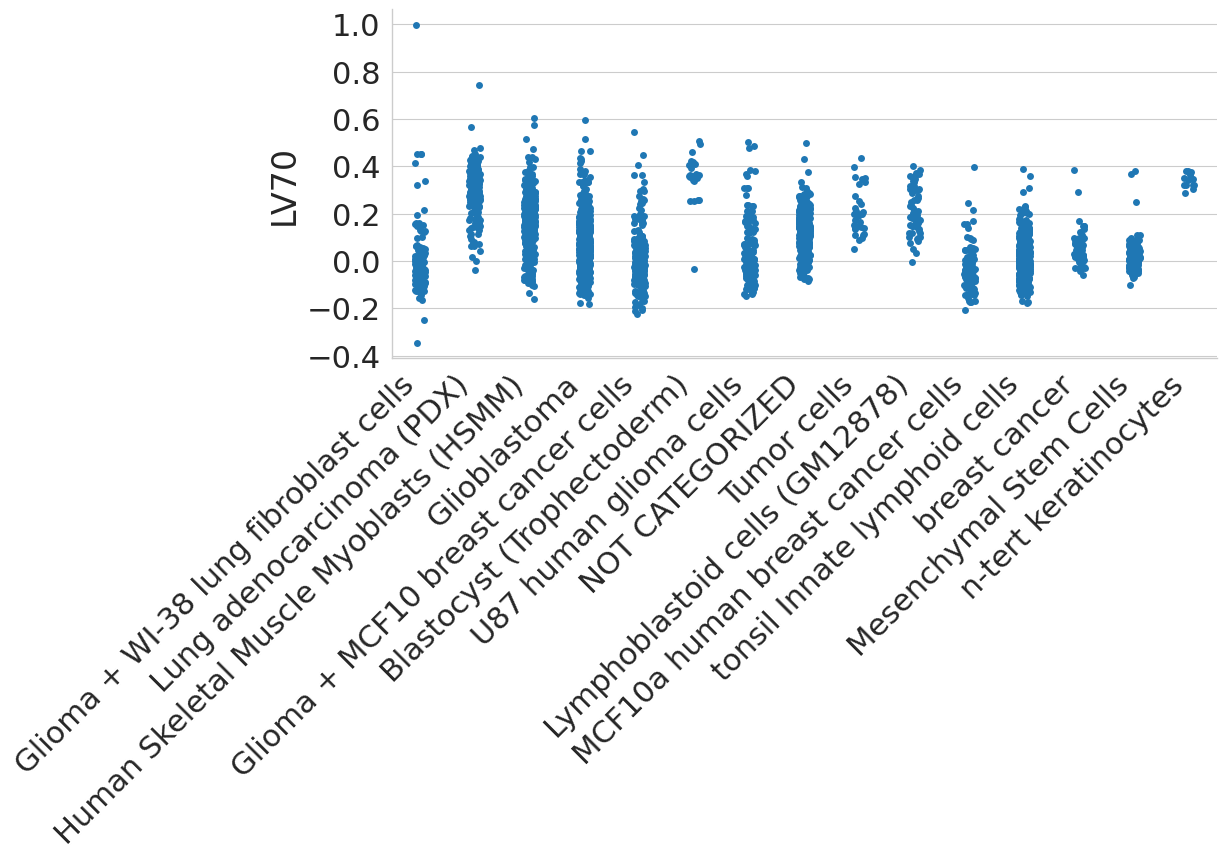

In [49]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

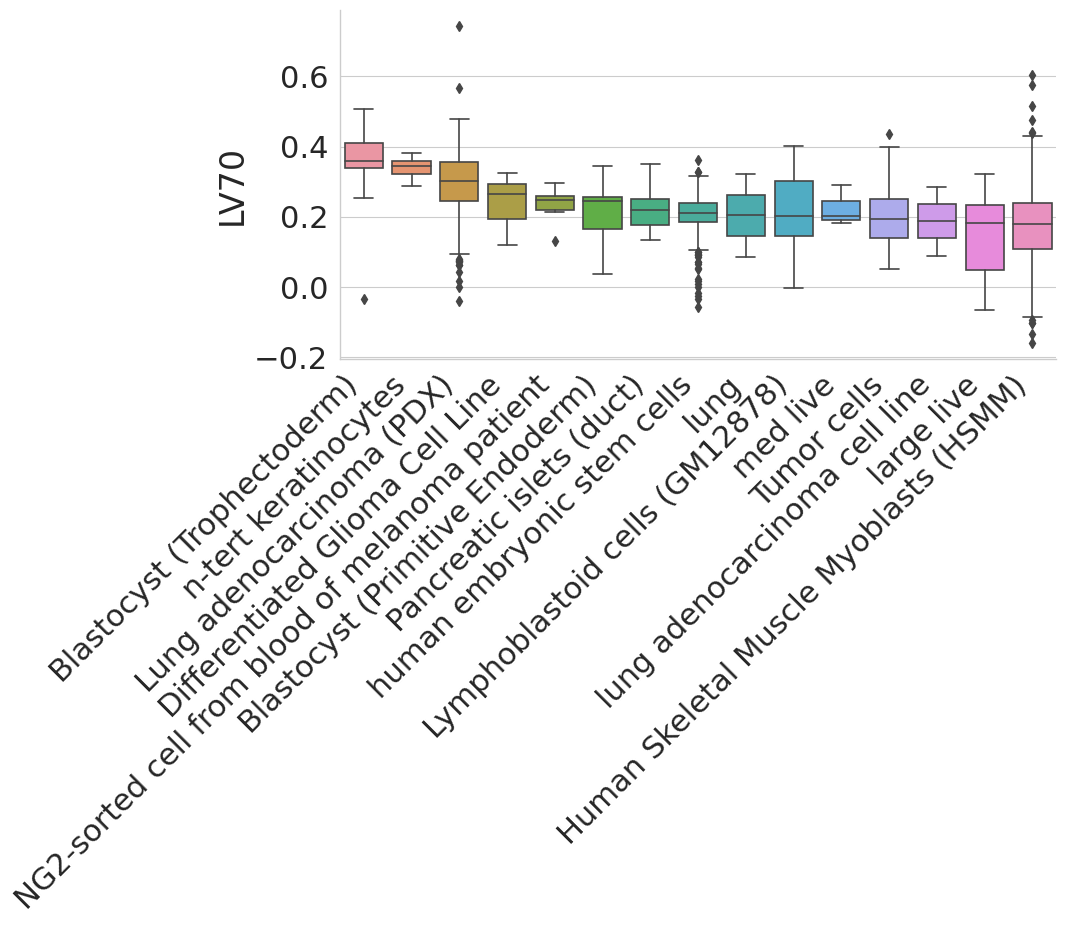

In [392]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

# Debug

In [395]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("Human Skeletal Muscle Myoblasts")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type      LV70
project   run                                                         
SRP033135 SRR1033274  Human Skeletal Muscle Myoblasts (HSMM)  0.602396
          SRR1033195  Human Skeletal Muscle Myoblasts (HSMM)  0.575768
          SRR1033189  Human Skeletal Muscle Myoblasts (HSMM)  0.514776
          SRR1033179  Human Skeletal Muscle Myoblasts (HSMM)  0.474161
          SRR1033107  Human Skeletal Muscle Myoblasts (HSMM)  0.440265
          SRR1032925  Human Skeletal Muscle Myoblasts (HSMM)  0.438199
          SRR1033127  Human Skeletal Muscle Myoblasts (HSMM)  0.430155
          SRR1033265  Human Skeletal Muscle Myoblasts (HSMM)  0.419189
          SRR1033116  Human Skeletal Muscle Myoblasts (HSMM)  0.398639
          SRR1033079  Human Skeletal Muscle Myoblasts (HSMM)  0.395488
          SRR1033129  Human Skeletal Muscle Myoblasts (HSMM)  0.381113
          SRR1033244  Human Skeletal Muscle Myoblasts (HSMM)  0.380618
          SRR1033188  Human Skeletal Muscle Myoblasts (HSMM)  0.377124
          SRR1033165  Human Skeletal Muscle Myoblasts (HSMM)  0.368738
          SRR1033045  Human Skeletal Muscle Myoblasts (HSMM)  0.359537
          SRR1033202  Human Skeletal Muscle Myoblasts (HSMM)  0.358733
          SRR1033062  Human Skeletal Muscle Myoblasts (HSMM)  0.353863
          SRR1033013  Human Skeletal Muscle Myoblasts (HSMM)  0.353609
          SRR1032991  Human Skeletal Muscle Myoblasts (HSMM)  0.345500
          SRR1033276  Human Skeletal Muscle Myoblasts (HSMM)  0.341917

In [396]:
# what is there in these projects?
_tmp = (
    lv_data.loc[["SRP033135"]]
    .dropna(how="all", axis=1)
    .sort_values(LV_NAME, ascending=False)
)

display(_tmp.head(60))

cell type  \
project   run                                                  
SRP033135 SRR1033274  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033195  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033189  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033179  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033107  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032925  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033127  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033265  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033116  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033079  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033129  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033244  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033188  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033165  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033045  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033202  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033062  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033013  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032991  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033276  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033270  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033074  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033215  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033091  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033243  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032947  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033007  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033024  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032920  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032980  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033104  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033143  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032954  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033148  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032955  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033156  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032949  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032934  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033030  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032929  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032917  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033224  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032923  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032995  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033044  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033026  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033101  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033038  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033264  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033117  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033261  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033201  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033089  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033078  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033064  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032963  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032940  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1032970  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033050  Human Skeletal Muscle Myoblasts (HSMM)   
          SRR1033056  Human Skeletal Muscle Myoblasts (HSMM)   

                     hour post serum-switch debris control well cells in well  \
p

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )